### COVID-19 and Market Analysis Final Project

In [1]:
pip install alpha-vantage

Note: you may need to restart the kernel to use updated packages.


##### 1.Importing Libraries

In [2]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import datetime
import numpy as np
import matplotlib.dates as mdates

##### 2.Reading Confirmed Cases and Death Cases in two diffrent Dataframes

In [3]:
df_CC = pd.read_csv ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_DC = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [4]:
df_CC

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,205541,205612,205612,205802,205830,205907,206073,206133,206145,206206
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333316,333322,333330,333330,333338,333343,333360,333381,333391,333408
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271057,271061,271061,271079,271082,271090,271096,271100,271102,271107
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,46824,46824,46824,46824,46824,47219,47219,47219,47219,47219
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,104491,104491,104491,104491,104491,104676,104676,104676,104676,104676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,703036
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,333721,333721,333721,333721,333746,333746,333746,333746,333746,333746


In [5]:
df_DC

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7833,7834,7834,7834,7834
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,156,156,156,156,156,157,157,157,157,157
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1923,1923,1923,1923,1923,1924,1924,1924,1924,1924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019


##### 3.Dataframe that aggregates and sums both confirmed cases and deaths on a global level.

##### Remove all the unnecessary columns from both the datasets

In [6]:
df_CC.drop(columns=['Province/State','Lat','Long'], inplace=True)
df_DC.drop(columns=['Province/State','Lat','Long'], inplace=True)

In [7]:
df_CC

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,205541,205612,205612,205802,205830,205907,206073,206133,206145,206206
1,Albania,0,0,0,0,0,0,0,0,0,...,333316,333322,333330,333330,333338,333343,333360,333381,333391,333408
2,Algeria,0,0,0,0,0,0,0,0,0,...,271057,271061,271061,271079,271082,271090,271096,271100,271102,271107
3,Andorra,0,0,0,0,0,0,0,0,0,...,46824,46824,46824,46824,46824,47219,47219,47219,47219,47219
4,Angola,0,0,0,0,0,0,0,0,0,...,104491,104491,104491,104491,104491,104676,104676,104676,104676,104676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,703036
285,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,Yemen,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,Zambia,0,0,0,0,0,0,0,0,0,...,333721,333721,333721,333721,333746,333746,333746,333746,333746,333746


In [8]:
df_DC

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7833,7834,7834,7834,7834
1,Albania,0,0,0,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,Algeria,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,Andorra,0,0,0,0,0,0,0,0,0,...,156,156,156,156,156,157,157,157,157,157
4,Angola,0,0,0,0,0,0,0,0,0,...,1923,1923,1923,1923,1923,1924,1924,1924,1924,1924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,Yemen,0,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,Zambia,0,0,0,0,0,0,0,0,0,...,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019


##### Make duplicate of dataset to analysed the effect of covid on the sharemarket

In [9]:
df_confirmed = df_CC
df_death = df_DC

There are many records for the same country is present in the dataframe let's merge those using groupby on country column and sum the cases

In [10]:
df_confirmed = df_CC.groupby(['Country/Region']).sum()
df_confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,205541,205612,205612,205802,205830,205907,206073,206133,206145,206206
Albania,0,0,0,0,0,0,0,0,0,0,...,333316,333322,333330,333330,333338,333343,333360,333381,333391,333408
Algeria,0,0,0,0,0,0,0,0,0,0,...,271057,271061,271061,271079,271082,271090,271096,271100,271102,271107
Andorra,0,0,0,0,0,0,0,0,0,0,...,46824,46824,46824,46824,46824,47219,47219,47219,47219,47219
Angola,0,0,0,0,0,0,0,0,0,0,...,104491,104491,104491,104491,104491,104676,104676,104676,104676,104676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,703036,703036,703036,703036,703036,703036,703036,703036,703036,703036
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945


In [11]:
df_death = df_DC.groupby(['Country/Region']).sum()
df_death

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7833,7834,7834,7834,7834
Albania,0,0,0,0,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
Algeria,0,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
Andorra,0,0,0,0,0,0,0,0,0,0,...,156,156,156,156,156,157,157,157,157,157
Angola,0,0,0,0,0,0,0,0,0,0,...,1923,1923,1923,1923,1923,1924,1924,1924,1924,1924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159


In [12]:
df_covid_confirm = df_confirmed.sum(axis=1)
df_covid_confirm = df_covid_confirm.reset_index()

df_covid_confirm.columns = ['Country Name', 'Confirmed Cases']
df_covid_confirm

,Country Name,Confirmed Cases
0,Afghanistan,110214917
1,Albania,153830108
2,Algeria,156966802
3,Andorra,20010202
4,Angola,50040541
...,...,...
196,West Bank and Gaza,345738380
197,Winter Olympics 2022,163637
198,Yemen,6744660
199,Zambia,163803740


In [13]:
df_covid_death = df_death.sum(axis=1)
df_covid_death = df_covid_death.reset_index()

df_covid_death.columns = ['Country Name', 'Total Deaths']
df_covid_death

,Country Name,Total Deaths
0,Afghanistan,4673864
1,Albania,2143775
2,Algeria,4247580
3,Andorra,111622
4,Angola,1048488
...,...,...
196,West Bank and Gaza,3212449
197,Winter Olympics 2022,0
198,Yemen,1310341
199,Zambia,2248142


##### Merging the above Dataframe Based on Country column.

In [14]:
df_global_level = pd.merge(df_covid_confirm, df_covid_death, on='Country Name')
df_global_level

,Country Name,Confirmed Cases,Total Deaths
0,Afghanistan,110214917,4673864
1,Albania,153830108,2143775
2,Algeria,156966802,4247580
3,Andorra,20010202,111622
4,Angola,50040541,1048488
...,...,...,...
196,West Bank and Gaza,345738380,3212449
197,Winter Olympics 2022,163637,0
198,Yemen,6744660,1310341
199,Zambia,163803740,2248142


##### 4. Researching on the Stock Market Performance

In [15]:
acc_key = 'I993XQJOKA4I528G'
ts = TimeSeries(key=acc_key,output_format='pandas')
a_american = ts.get_weekly_adjusted('NASDX')
b_canadian = ts.get_weekly_adjusted('TSCO.LON')
c_travel = ts.get_weekly_adjusted('AC') 
d_real_estate = ts.get_weekly_adjusted('PLD')
e_precious_metals = ts.get_weekly_adjusted('CIGI')

In [16]:
df_america = pd. DataFrame(a_american[0])
df_canada = pd.DataFrame(b_canadian[0]) 
df_travel = pd.DataFrame(c_travel[0]) 
df_real_estate = pd.DataFrame(d_real_estate[0]) 
df_precious_metal = pd.DataFrame(e_precious_metals[0])

df_america = df_america.reset_index(level=0)
df_canada = df_canada.reset_index(level=0)
df_travel = df_travel.reset_index(level=0)
df_real_estate = df_real_estate.reset_index(level=0)
df_precious_metal = df_precious_metal.reset_index(level=0)

##### 5. Using AlphaVantage

In [17]:
df_america = df_america[['date','2. high','3. low']]
df_canada = df_canada[['date','2. high','3. low']]
df_travel = df_travel[['date','2. high','3. low']]
df_real_estate = df_real_estate[['date','2. high','3. low']]
df_precious_metal = df_precious_metal[['date','2. high','3. low']]

In [18]:
df_america.columns = ['date', 'US_high','US_low']
df_canada.columns = ['date', 'CAN_high','CAN_low']
df_travel.columns = ['date', 'Travel_high','Travel_low']
df_real_estate.columns = ['date', 'Real_estate_high','Real_estate_low']
df_precious_metal.columns = ['date', 'Metal_high','Metal_low']

##### Merging the stock dataframes

In [19]:
df_stocks = df_america.merge(df_canada,on='date').merge(df_travel,on='date').merge(df_real_estate,on='date').merge(df_precious_metal,on='date')
df_stocks

,date,US_high,US_low,CAN_high,CAN_low,Travel_high,Travel_low,Real_estate_high,Real_estate_low,Metal_high,Metal_low
0,2022-11-25,26.31,25.68,238.8000,229.632,41.00,40.1841,116.940,113.3400,94.980,90.860
1,2022-11-18,26.37,25.95,232.3134,221.900,41.21,38.5900,115.610,110.4200,100.740,91.580
2,2022-11-11,26.25,23.99,230.7000,222.000,41.63,39.5100,119.420,107.1200,101.980,86.470
3,2022-11-04,25.33,23.74,224.3000,212.900,42.53,39.9300,112.250,103.7200,96.075,84.160
4,2022-10-28,25.91,24.85,219.9000,208.100,41.72,40.0100,113.460,102.2200,100.190,94.520
...,...,...,...,...,...,...,...,...,...,...,...
355,2016-01-08,11.52,10.94,150.0000,137.000,30.40,29.1100,42.935,41.0000,44.950,41.475
356,2015-12-31,12.03,11.77,151.5500,147.200,31.19,29.4700,43.600,42.2402,45.130,43.940
357,2015-12-24,11.87,11.70,153.1500,141.000,31.85,29.9000,42.690,41.5900,45.300,43.680
358,2015-12-18,11.96,11.58,153.0360,142.600,31.41,28.0500,42.470,40.4700,45.270,43.760


##### 6. Appending the info to the data frame.

In [20]:
df_confirmed1 = df_confirmed.reset_index()

In [21]:
df_death1 = df_death.reset_index()

In [22]:
df_can_case = df_confirmed1[df_confirmed1['Country/Region']=='Canada']
df_us_case = df_confirmed1[df_confirmed1['Country/Region']=='US']
df_row_case = pd.concat([df_can_case, df_us_case], ignore_index=True)
df_row_case

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22
0,Canada,0,2,3,3,3,3,4,4,4,...,4428546,4428546,4428546,4430558,4431111,4432426,4444843,4444912,4444912,4444912
1,US,1,1,2,2,5,5,5,6,6,...,98566341,98569058,98573468,98633140,98697622,98807782,98924207,98962019,98967906,98972375


In [23]:
df_new = df_row_case.transpose()
df_new = df_new.reset_index()
df_new.columns = ['date1','Canada_Conformed_case','US_Conformed_case']
df_new = df_new.iloc[1: , :]
df_new

,date1,Canada_Conformed_case,US_Conformed_case
1,1/22/20,0,1
2,1/23/20,2,1
3,1/24/20,3,2
4,1/25/20,3,2
5,1/26/20,3,5
...,...,...,...
1044,11/30/22,4432426,98807782
1045,12/1/22,4444843,98924207
1046,12/2/22,4444912,98962019
1047,12/3/22,4444912,98967906


In [24]:
df_can_death = df_death1[df_confirmed1['Country/Region']=='Canada']
df_us_death = df_death1[df_confirmed1['Country/Region']=='US']
df_row_death = pd.concat([df_can_death, df_us_death], ignore_index=True)
df_row_death

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/25/22,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22
0,Canada,0,0,0,0,0,0,0,0,0,...,47862,47862,47862,47923,47923,48002,48133,48133,48133,48133
1,US,0,0,0,0,0,0,0,0,0,...,1079294,1079296,1079296,1079576,1079969,1080536,1081147,1081412,1081431,1081431


In [25]:
df_new1 = df_row_death.transpose()
df_new1 = df_new1.reset_index()
df_new1.columns = ['date1','Canada_Death','US_Death']
df_new1 = df_new1.iloc[1: , :]
df_new1

,date1,Canada_Death,US_Death
1,1/22/20,0,0
2,1/23/20,0,0
3,1/24/20,0,0
4,1/25/20,0,0
5,1/26/20,0,0
...,...,...,...
1044,11/30/22,48002,1080536
1045,12/1/22,48133,1081147
1046,12/2/22,48133,1081412
1047,12/3/22,48133,1081431


In [26]:
df_final = df_new.merge(df_new1,on='date1')
df_final

,date1,Canada_Conformed_case,US_Conformed_case,Canada_Death,US_Death
0,1/22/20,0,1,0,0
1,1/23/20,2,1,0,0
2,1/24/20,3,2,0,0
3,1/25/20,3,2,0,0
4,1/26/20,3,5,0,0
...,...,...,...,...,...
1043,11/30/22,4432426,98807782,48002,1080536
1044,12/1/22,4444843,98924207,48133,1081147
1045,12/2/22,4444912,98962019,48133,1081412
1046,12/3/22,4444912,98967906,48133,1081431


In [27]:
# change date formate
df_final['date']=pd.to_datetime(df_final['date1'])
df_final.drop(columns=['date1'], inplace=True)
df_final

,Canada_Conformed_case,US_Conformed_case,Canada_Death,US_Death,date
0,0,1,0,0,2020-01-22
1,2,1,0,0,2020-01-23
2,3,2,0,0,2020-01-24
3,3,2,0,0,2020-01-25
4,3,5,0,0,2020-01-26
...,...,...,...,...,...
1043,4432426,98807782,48002,1080536,2022-11-30
1044,4444843,98924207,48133,1081147,2022-12-01
1045,4444912,98962019,48133,1081412,2022-12-02
1046,4444912,98967906,48133,1081431,2022-12-03


In [28]:
final_df = df_final.merge(df_stocks, on='date', how='left')
final_df

,Canada_Conformed_case,US_Conformed_case,Canada_Death,US_Death,date,US_high,US_low,CAN_high,CAN_low,Travel_high,Travel_low,Real_estate_high,Real_estate_low,Metal_high,Metal_low
0,0,1,0,0,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,0,0,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2,0,0,2020-01-24,21.07,20.9,250.3261,240.6001,65.46,42.3,96.78,93.12,84.2,80.91
3,3,2,0,0,2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,5,0,0,2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,4432426,98807782,48002,1080536,2022-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1044,4444843,98924207,48133,1081147,2022-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1045,4444912,98962019,48133,1081412,2022-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1046,4444912,98967906,48133,1081431,2022-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### 7.Creating Graphs

Overall American Stock market 

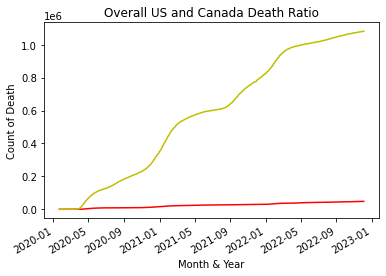

In [29]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


fig = plt.figure()

plt.plot_date(final_df['date'], final_df['Canada_Death'], 'r-')
plt.plot_date(final_df['date'], final_df['US_Death'], 'y-')
plt.title("Overall US and Canada Death Ratio")
plt.xlabel('Month & Year')
plt.ylabel('Count of Death')

fig.autofmt_xdate()
plt.show()

* From above graph we can see that canada has lower Death ratio than the US  
Red Line = Canada  | Yellow Line = US

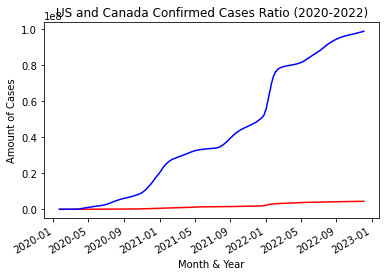

In [30]:
fig = plt.figure()

plt.plot_date(final_df['date'], final_df['Canada_Conformed_case'], 'r-')
plt.plot_date(final_df['date'], final_df['US_Conformed_case'], 'b-')
plt.title("US and Canada Confirmed Cases Ratio (2020-2022)")
plt.xlabel('Month & Year')
plt.ylabel('Amount of Cases')

fig.autofmt_xdate()
plt.show()

* We can see that canada have lower cases than the United State from the above Graph.  
Blue Line Represent Canada  | Red Line represent United State

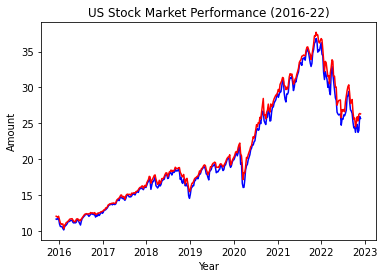

In [31]:
plt.plot(df_stocks["date"], df_stocks["US_low"],'b-')
plt.plot(df_stocks["date"], df_stocks["US_high"],'r-')

plt.title("US Stock Market Performance (2016-22)")
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

* From this graph In the breakout of Covid markets saw sharp decline in the first quater of 2021 and after that we can see that US perform better during the peak of the Covid-19 period till the end of 2021 then it declined sharply in the year of 2022 beacause of external factors like Ukraine-Russia War. 

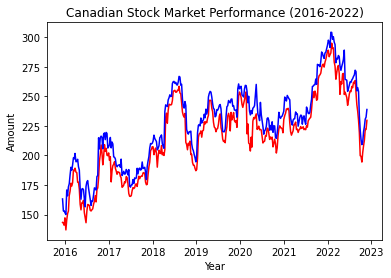

In [32]:
plt.plot(df_stocks["date"], df_stocks["CAN_low"],'r-')
plt.plot(df_stocks["date"], df_stocks["CAN_high"],'b-')

plt.title("Canadian Stock Market Performance (2016-2022)")
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

* As we can see increasing number of conformed cases and the death has not affected the CANADA overall Stock market. As this market shows keep increasing trend till end of the 2021 and then it little declined due to external Factors for example Ukraine-Russia War.